<a href="https://colab.research.google.com/github/ezahner/AI/blob/main/HW7/AI_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Author: Erin Zahner
<br> AI: HW 7
<br> NASA Astriod Classification Using MLP Classifier</h3>

# **Task**

* Create an MLPClassifier model that can as accurately as possible classify an asteroid as Hazardous or Non-Hazardous (binary classification).

# **Mount Drive and Load DataFrame**

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Get path to drive
import os
os.chdir("/content/drive/My Drive")

In [3]:
# Load the dataset
import pandas as pd
data = pd.read_csv('Copy of nasa_asteroid.csv') # Had to make copy of file

# **Data Classification Accuracy**

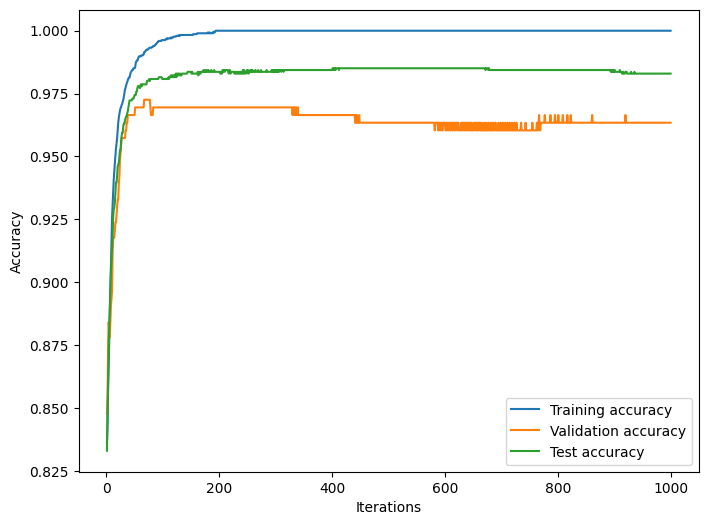

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Drop irrelevant data from X and the Target
X = data.drop(['Close Approach Date', 'Name', 'Hazardous', 'Orbiting Body', 'Orbit Determination Date', 'Equinox'], axis=1)
y = data['Hazardous']

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))


plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Loss Curve**

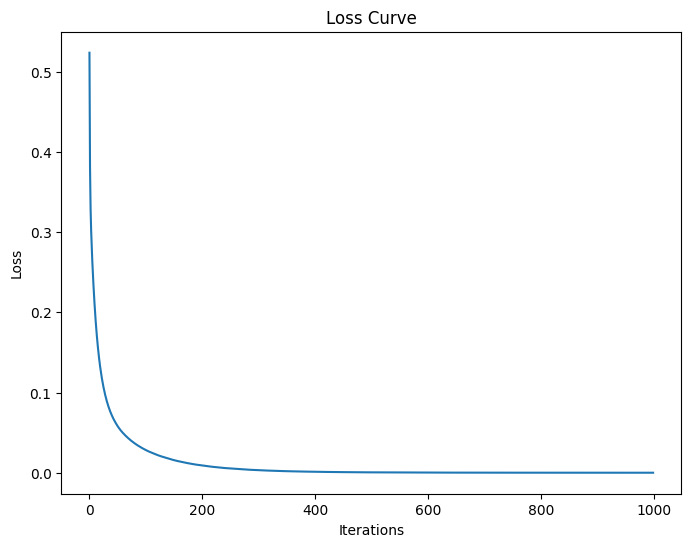

In [5]:
# Display loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# **Confusion Matrix**

Overall classification accuracy: 0.9829424307036247


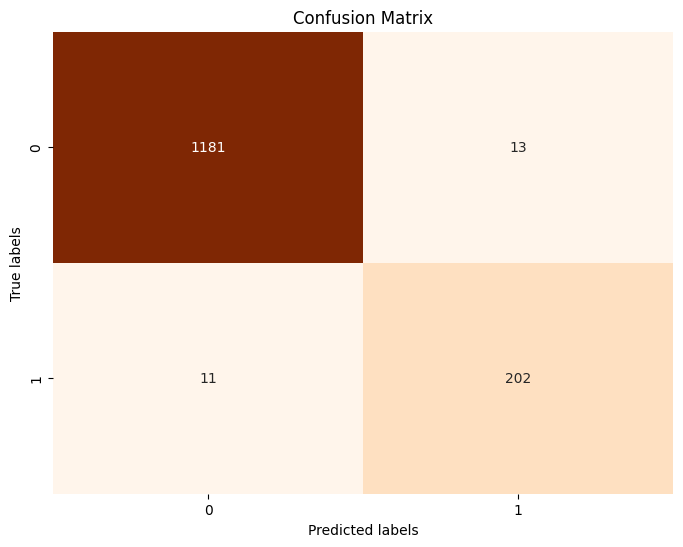

In [6]:
# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall classification accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


From these graphs, we see that the MLP Classifier did a very good job at classifying asteroids as Hazardous or Not Hazardous. We can see from the first graoh that the validation accuracy of was around 96% and the test accuracy was near 100%! This becomes even clearer when we look at the confusion matrix. Here, we can see that only 24 of the asteroids were falsely classified. This is incredible accuracy and shows the utility of neural networks.

# **Testing Different Hyperparameters**

**<h2>Number of Neurons in Single Hidden Layer</h2>**

In [14]:
# Define a grid of values for the number of neurons in a single hidden layer
hidden_layer_sizes = [1, 2, 5, 7, 10, 15, 20, 30, 50, 100]

# Initialize lists to store results
results = []

# Iterate over each value of the number of neurons
for neurons in hidden_layer_sizes:
    # Initialize and train MLPClassifier with current number of neurons
    mlp = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)

    # Evaluate the model on the validation set
    val_accuracy = mlp.score(X_val, y_val)

    # Store the number of neurons and validation accuracy
    results.append({'Neurons in Hidden Layer': neurons, 'Validation Accuracy': val_accuracy})

# Summarize the results in a table
result_df = pd.DataFrame(results)
print(result_df)

   Neurons in Hidden Layer  Validation Accuracy
0                        1             0.957317
1                        2             0.987805
2                        5             0.990854
3                        7             0.978659
4                       10             0.978659
5                       15             0.975610
6                       20             0.978659
7                       30             0.975610
8                       50             0.972561
9                      100             0.969512


Here, I tested the effects of increasing the number of neurons in a single hidden layer. From this, we can see that it having more neurons is not always better. The accruacy gets a little better going from 1 neuron to 2 and to 5, but from 5 to 7 it gets worse and then the accuracy platues. For the best resutls, there should be 5 neurons in a single hidden layer, in order to obtain 99% accuracy. Looking back at the original classifications, we can see that the validation accuracy is around 96%. This is because by default the MLP Classifier has one hidden layer with 100 neurons. This matches the validation accuracy we see when I deliberately tested one hidden layer wth 100 neurons. From this, we can see that sometimes more is less and less is more. You get greater validation accuracy with just a handful of neurons and risk overfitting if you have too many neurons. Next, we will test the effects of having multiple hidden layers.

**<h2>Number of Neurons in Number of Hidden Layer</h2>**

In [16]:
# Define a grid of values for the number of hidden layers
hidden_layers_range = [(1,1), (2,2), (5,5), (1,1,1), (2,2,2), (5,5,5), (1,1,1,1), (2,2,2,2), (5,5,5,5), (1,1,1,1,1), (2,2,2,2,2), (5,5,5,5,5)]

# Initialize lists to store results
results = []

# Iterate over each value of the number of hidden layers
for hidden_layers in hidden_layers_range:
    # Initialize and train MLPClassifier with current number of hidden layers
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)

    # Evaluate the model on the validation set
    val_accuracy = mlp.score(X_val, y_val)

    # Store the number of hidden layers and validation accuracy
    results.append({'Hidden Layers': hidden_layers, 'Validation Accuracy': val_accuracy})

# Summarize the results in a table
result_df = pd.DataFrame(results)
print(result_df)


      Hidden Layers  Validation Accuracy
0            (1, 1)             0.960366
1            (2, 2)             0.987805
2            (5, 5)             0.987805
3         (1, 1, 1)             0.960366
4         (2, 2, 2)             0.990854
5         (5, 5, 5)             0.984756
6      (1, 1, 1, 1)             0.844512
7      (2, 2, 2, 2)             0.990854
8      (5, 5, 5, 5)             0.984756
9   (1, 1, 1, 1, 1)             0.844512
10  (2, 2, 2, 2, 2)             0.990854
11  (5, 5, 5, 5, 5)             0.981707


Here, I decided to test varying number of hidden layers, with varying numbers of neurons in each layer. There is definetely a lot of variation in the results of these tests, but a lot of the variation is due to the number of neurons in each layer, not the number of layers themselves. Lets look at all the tests with 1 neuron in each layer. The results (including the previous test of one hidden layer) were: 95.5%, 96%, 96%, 84.4%, 84.4%, and. From this, we can see that there is some benefit to adding more layers, each with only one neuron, but after 3 hidden layers, there is a fairly drastic negative effect on the classification accuracy. When the complexity of the network is increased (adding more layers), but each layer remains shallow (with only one neuron) it is hard for the for the model to generalize on the unseen data. The tests with two neurons in each hidden layer gave very different results. The results of these tests were: 98.7%, 98.7%, 99%, 99%, 99%. With two neurons per hidden layer, we are no longer underfitting the data in each layer. There is more flexibility with more neurons (to a certain extent). Having two neurons increases the capacity for the model to handle more complex patterns. However, this seems a bit contridictory when we look at the results of five neurons per layer. Here the results were: 99%, 98.7%, 98.4%,98.4%, 98.1%. Here, there is not a drastic decrease in accuracy with more layers as we saw with 1 neuron, nonetheless, we can see that adding more layers with five neurons each does not have a positive effect on the accuracy. This is likely due to overfitting the data. Add more neurons and layers can only help so much and eventually it will end up negatively affecting the models capability to properly classify data.

# **Conclusion**

From this, we can see that neural networks are incredibly useful for classifying data and they can be further manipulated to improve their classification capabilities. It is important to be careful when manipulating the number of neurons and/or hidden layers in your neural network. You risk underfitting your data with too few, or overfitting with too many. From my tests of hyperparameters, it seems that with one hidden layer of 5 neurons or multiple hidden layers with 2 neurons return the highest validation accuracy (99%). Overall, it is obvious that neural networks have incredible capabilities when it comes to classification, we just need to make sure we are giving them the best parameters.  